In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
def get_data():
    rows = []
    region_map = {
        'Region_US_East': ['USA', 'Canada', 'Mexico', 'Panama', 'Costa Rica'],
        'Region_EU_Central': ['Germany', 'France', 'Poland', 'Italy', 'Netherlands', 'Spain', 'Sweden'],
        'Region_Asia_Pacific': ['China', 'Vietnam', 'Thailand', 'India', 'Japan', 'South Korea', 'Malaysia'],
        'Region_LatAm_South': ['Brazil', 'Argentina', 'Chile', 'Peru', 'Colombia'],
        'Region_Africa_West': ['Nigeria', 'Ghana', 'Ivory Coast', 'Senegal', 'Cameroon']
    }
    regions = list(region_map.keys())

    vendors_by_region = {
        'Region_US_East': [f'US_Supply_Co_{i}' for i in range(1, 6)],
        'Region_EU_Central': [f'Euro_Ind_{i}' for i in range(1, 6)],
        'Region_Asia_Pacific': [f'Asia_Tech_{i}' for i in range(1, 8)],
        'Region_LatAm_South': [f'LatAm_Logistics_{i}' for i in range(1, 5)],
        'Region_Africa_West': [f'Afro_Trade_{i}' for i in range(1, 4)]
    }

    country_product_map = {
        # --- ASIA ---
        'China': ['Consumer Electronics', 'Plastic Resins', 'Steel Rolls', 'Lithium Batteries'],
        'Vietnam': ['Textiles', 'Rubber', 'Coffee Beans', 'Electronics'],
        'Thailand': ['Auto Parts', 'Electronics', 'Rubber'],
        'India': ['Textiles', 'Raw Cotton', 'Spices', 'Steel Rolls'],
        'Japan': ['Auto Parts', 'Microchips', 'Robotics'],
        'South Korea': ['Microchips', 'Consumer Electronics', 'Steel Rolls'],
        'Malaysia': ['Microchips', 'Rubber', 'Palm Oil'],

        # --- EUROPE ---
        'Germany': ['Auto Parts', 'Industrial Machinery', 'Chemicals', 'Steel Rolls'],
        'France': ['Luxury Goods', 'Aerospace Parts', 'Chemicals', 'Wine/Beverage'],
        'Italy': ['Textiles', 'Furniture', 'Leather', 'Industrial Machinery'],
        'Netherlands': ['Chemicals', 'Flowers/Agri', 'Electronics'],
        'Spain': ['Agri Products', 'Auto Parts', 'Textiles'],
        'Sweden': ['Industrial Machinery', 'Auto Parts', 'Steel Rolls'],
        'Poland': ['Furniture', 'Auto Parts', 'Copper'],

        # --- AMERICAS ---
        'USA': ['Medical Devices', 'Chemicals', 'Precision Parts', 'Corn/Wheat'],
        'Canada': ['Wood/Lumber', 'Raw Materials', 'Auto Parts'],
        'Mexico': ['Auto Parts', 'Consumer Electronics', 'Silver', 'Plastic Resins'],
        'Brazil': ['Coffee Beans', 'Iron Ore', 'Raw Cotton', 'Soybeans'],
        'Argentina': ['Soybeans', 'Corn/Wheat', 'Lithium Batteries'],
        'Chile': ['Copper', 'Lithium Batteries', 'Fruit'],
        'Peru': ['Copper', 'Gold/Silver', 'Textiles'],
        'Colombia': ['Coffee Beans', 'Flowers/Agri', 'Oil/Petroleum'],
        'Panama': ['Bananas/Fruit', 'Seafood'],
        'Costa Rica': ['Medical Devices', 'Bananas/Fruit'],

        # --- AFRICA ---
        'Nigeria': ['Crude Oil', 'Cocoa Beans'],
        'Ghana': ['Cocoa Beans', 'Gold/Diamonds'],
        'Ivory Coast': ['Cocoa Beans', 'Coffee Beans', 'Rubber'],
        'Senegal': ['Fish/Seafood', 'Chemicals'],
        'Cameroon': ['Cocoa Beans', 'Wood/Lumber', 'Oil/Petroleum']
    }

    # PRODUCT COMPLEXITY MAP (Risk Adder)
    # Higher number = Higher inherent risk of delay/damage
    product_risk_map = {
        'Microchips': 0.25, 'Medical Devices': 0.20, 'Lithium Batteries': 0.30,
        'Consumer Electronics': 0.15, 'Auto Parts': 0.10, 'Chemicals': 0.20,
        'Textiles': 0.05, 'Coffee Beans': 0.10, 'Cocoa Beans': 0.12,
        'Industrial Machinery': 0.15, 'Luxury Goods': 0.10, 'Aerospace Parts': 0.25,
        'Robotics': 0.20, 'Toys': 0.05, 'Footwear': 0.05, 'Furniture': 0.05,
        'Pharmaceuticals': 0.25, 'Agricultural Products': 0.15,
        'Raw Cotton': 0.08, 'Steel Rolls': 0.05, 'Iron Ore': 0.05,
        'Plastic Resins': 0.05, 'Rubber': 0.05, 'Gold/Diamonds': 0.30,
        'Crude Oil': 0.10, 'Copper': 0.05
    }

    defect_map = {
        # --- FINISHED GOODS ---
        'Microchips': ['Calibration Error', 'Temperature Excursion', 'Software Bug', 'ESD Damage'],
        'Medical Devices': ['Sterilization Failure', 'Software Bug', 'Calibration Error', 'Packaging Breach'],
        'Lithium Batteries': ['Leakage', 'Overheating Risk', 'Voltage Instability', 'Labeling Error'],
        'Consumer Electronics': ['Software Bug', 'Battery Drain', 'Cosmetic Scratch', 'Dead Pixel'],
        'Auto Parts': ['Dimension Mismatch', 'Rust/Corrosion', 'Material Fatigue', 'Welding Defect'],
        'Textiles': ['Color Mismatch', 'Stitching Defect', 'Fabric Tear', 'Pattern Error'],
        'Furniture': ['Scratch/Dent', 'Wood Warp', 'Missing Part', 'Upholstery Tear'],
        'Luxury Goods': ['Cosmetic Scratch', 'Packaging Breach'],
        'Aerospace Parts': ['Dimension Mismatch', 'Material Fatigue'],
        'Robotics': ['Software Bug', 'Calibration Error'],
        'Toys': ['Broken Component', 'Paint Defect'],
        'Footwear': ['Stitching Defect', 'Material Tear'],
        'Pharmaceuticals': ['Contamination', 'Temperature Excursion'],

        # --- RAW MATERIALS (METALS) ---
        'Steel Rolls': ['Rust/Corrosion', 'Thickness Variance', 'Surface Scratch', 'Edge Crack'],
        'Iron Ore': ['Moisture Content High', 'Impurity/Silica', 'Granule Size Fail'],
        'Copper': ['Oxidation', 'Purity Variance'],
        'Gold/Diamonds': ['Fake/Synthetic', 'Weight Discrepancy', 'Certification Missing'],
        'Silver': ['Tarnish/Oxidation', 'Weight Discrepancy'],

        # --- RAW MATERIALS (AGRICULTURE) ---
        'Raw Cotton': ['Moisture Damage', 'Mold/Fungus', 'Fiber Length Fail', 'Pest Infestation'],
        'Coffee Beans': ['Moisture Damage', 'Mold/Fermentation', 'Insect Damage', 'Broken Beans'],
        'Cocoa Beans': ['Mold/Fungus', 'Fermentation Issue', 'Pest Infestation'],
        'Soybeans': ['Moisture Damage', 'Heat Damage', 'Mold'],
        'Corn/Wheat': ['Moisture Damage', 'Pest Infestation', 'Mold'],
        'Flowers/Agri': ['Wilting', 'Temperature Damage', 'Pest Infestation'],

        # --- RAW MATERIALS (CHEMICALS/PLASTICS) ---
        'Plastic Resins': ['Color Mismatch', 'Melting Point Fail', 'Contamination', 'Moisture Damage'],
        'Chemicals': ['Impurity Found', 'Container Leak', 'Concentration Error', 'Labeling Error'],
        'Rubber': ['Hardness Variance', 'Surface Cracking', 'Moisture Damage'],
        'Crude Oil': ['Water Content High', 'Sulfur Content High', 'Density Fail']
    }

    # Root Causes
    geo_reasons = ['Trade Tariffs', 'Port Strike', 'Civil Unrest', 'Border Closure', 'Sanctions']
    climate_zones = ['Typhoon Belt', 'Flood Plain', 'Wildfire Zone', 'Earthquake Fault', 'Monsoon Region']
    ops_reasons = ['Raw Material Shortage', 'Port Congestion', 'Machinery Breakdown', 'Customs Hold', 'Labor Strike']
    qual_reasons = ['Calibration Error', 'Packaging Damage', 'Impure Raw Material', 'Software Bug', 'Temperature Excursion']
    rel_reasons = ['Slow Response', 'Contract Dispute', 'Management Change', 'Pricing Conflict', 'Lack of Transparency']
    fin_reasons = ['High Debt Ratio', 'Liquidity Crisis', 'Pending Lawsuit', 'Merger Uncertainty', 'Credit Downgrade']


    for i in range(10000):

        region = random.choice(regions)
        country = random.choice(region_map[region])
        vendor = random.choice(vendors_by_region[region])
        possible_products = country_product_map.get(country, ['Raw Materials'])
        product = random.choice(possible_products)


        if country in ['USA', 'Canada', 'Mexico', 'Panama', 'Costa Rica']:
            mode = random.choice(['Land', 'Air'])
        else:
            # Europe, Asia, Africa, South America -> Sea or Air ONLY
            mode = random.choice(['Sea', 'Air'])

        # Risk Logic
        base_risk = {'Region_US_East': 10, 'Region_EU_Central': 20, 'Region_Asia_Pacific': 40, 'Region_LatAm_South': 70, 'Region_Africa_West': 90}[region]
        country_variance = random.randint(-15, 15)
        risk_idx = int(base_risk + country_variance + np.random.normal(0, 5))
        risk_idx = max(0, min(100, risk_idx))

        cap_util = int(np.random.normal(60, 12))
        cap_util = max(0, min(100, cap_util))
        val = random.randint(5000, 500000)

        # --- CUMULATIVE PROBABILITY (Updated with Product Risk) ---
        prob_late = 0.05
        if risk_idx > 60: prob_late += 0.30   # High Country Risk
        if cap_util > 85: prob_late += 0.60   # Factory Overload
        if val > 200000: prob_late += 0.05    # High Value
        if mode == 'Sea': prob_late += 0.10   # Slow Mode

        # ADD PRODUCT RISK
        # prob_late += product_risk_map[product]
        prob_late += product_risk_map.get(product, 0.10)

        # Outcome
        is_late = 1 if random.random() < prob_late else 0
        delay = random.randint(3, 20) if is_late else 0

        # Root Causes
        geo_reason = random.choice(geo_reasons) if risk_idx > 60 else "None"
        climate_zone = random.choice(climate_zones) if risk_idx > 70 else "Safe Zone"
        climate_risk = 'High' if risk_idx > 70 else 'Low'
        ops_reason = random.choice(ops_reasons) if is_late else "On Time"

        credit = np.random.choice(['AAA', 'AA', 'A', 'BBB', 'BB', 'C'], p=[0.1, 0.2, 0.3, 0.2, 0.1, 0.1])
        fin_reason = random.choice(fin_reasons) if credit in ['C', 'BB'] else "Stable"



        defect_rate = np.random.uniform(0, 0.05)
        defect_flag = 1 if defect_rate > 0.03 else 0
        qual_reason = random.choice(qual_reasons) if defect_flag else "Perfect"
        compliance_status = 'Fail' if random.random() < 0.02 else 'Pass'


        audit_status = np.random.choice(['Certified', 'Pending', 'Failed'], p=[0.90, 0.08, 0.02])

        if audit_status == 'Certified':
            # Certified vendors are reliable: Defect rate usually 0-2.5%
            defect_rate = np.random.uniform(0, 0.025)
        elif audit_status == 'Pending':
             # Unverified vendors are riskier: Defect rate 1-4%
            defect_rate = np.random.uniform(0.01, 0.04)
        else: # Failed
            # Failed vendors are bad: Defect rate 3-8%
            defect_rate = np.random.uniform(0.03, 0.08)

        # --- 3. DETERMINE DEFECT FLAG & ROOT CAUSE ---
        # Threshold > 3% is a "Problem Shipment"
        defect_flag = 1 if defect_rate > 0.03 else 0

        if defect_flag:
            possible_defects = defect_map.get(product, ['General Defect'])
            qual_reason = random.choice(possible_defects)
        else:
            qual_reason = "Perfect"

        # --- 4. COMPLIANCE STATUS ---
        compliance_status = 'Fail' if random.random() < 0.02 else 'Pass'

        # --- 5. RELATIONSHIP METRICS ---
        collab_score = round(random.uniform(1, 10), 1)
        rel_reason = random.choice(rel_reasons) if collab_score < 4.0 else "Good Standing"


        rows.append({
            'Order_ID': f"PO-{20240000+i}",
            'Product': product,
            'Vendor': vendor, 'Region': region, 'Country': country, 'Shipment_Mode': mode,
            'Order_Value_USD': val,

            # Geo
            'Country_Risk_Index': risk_idx,
            'Risk_Reason_Geo': geo_reason,
            'Natural_Disaster_Risk': climate_risk,
            'Climate_Zone_Detail': climate_zone,

            # Fin
            'Supplier_Credit_Rating': credit,
            'Financial_Risk_Reason': fin_reason,
            'DPO_Impact_Days': np.random.randint(30, 90),
            'Cost_Competitiveness': int(np.random.normal(100, 5)),

            # Ops
            'Is_Late': is_late, 'Delay_Days': delay,
            'Delay_Root_Cause': ops_reason,
            'Order_Accuracy_Rate': int(min(100, np.random.normal(98, 2))),
            'Capacity_Utilization': cap_util,

            # Qual
            'Defect_Rate': defect_rate,
            'Defect_Flag': defect_flag,
            'Defect_Root_Cause': qual_reason,
            'Audit_Status': audit_status,
            'Regulatory_Compliance': compliance_status,
            'ESG_Score': int(np.random.normal(75, 15)),

            # Rel
            'Responsiveness_Score': int(np.random.normal(85, 10)),
            'Innovation_Index': round(np.random.uniform(1, 10), 1),
            'Collaboration_Index': collab_score,
            'Relationship_Issue': rel_reason
        })

    df = pd.DataFrame(rows)
    return df

if __name__ == "__main__":
    df = get_data() # <--- Calls the function and assigns the result

    # Save the file
    df.to_csv('supply_chain_risk_analysis.csv', index=False)
    print("✅ Data Generated and Saved to supply_chain_risk_analysis.csv")

✅ Data Generated and Saved to supply_chain_risk_analysis.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('supply_chain_risk_analysis.csv')
df.head(5)

,Order_ID,Product,Vendor,Region,Country,Shipment_Mode,Order_Value_USD,Country_Risk_Index,Risk_Reason_Geo,Natural_Disaster_Risk,...,Defect_Rate,Defect_Flag,Defect_Root_Cause,Audit_Status,Regulatory_Compliance,ESG_Score,Responsiveness_Score,Innovation_Index,Collaboration_Index,Relationship_Issue
0,PO-20240000,Industrial Machinery,Euro_Ind_3,Region_EU_Central,Sweden,Sea,163672,24,NaN,Low,...,0.023550,0,Perfect,Certified,Pass,88,77,6.1,4.1,Good Standing
1,PO-20240001,Coffee Beans,LatAm_Logistics_4,Region_LatAm_South,Brazil,Sea,185704,80,Trade Tariffs,High,...,0.006858,0,Perfect,Certified,Pass,92,97,1.8,8.3,Good Standing
2,PO-20240002,Textiles,LatAm_Logistics_4,Region_LatAm_South,Peru,Sea,410239,78,Trade Tariffs,High,...,0.020554,0,Perfect,Certified,Pass,43,81,2.8,9.1,Good Standing
3,PO-20240003,Soybeans,LatAm_Logistics_3,Region_LatAm_South,Argentina,Air,225333,77,Sanctions,High,...,0.021440,0,Perfect,Certified,Pass,46,87,9.0,3.7,Management Change
4,PO-20240004,Wine/Beverage,Euro_Ind_3,Region_EU_Central,France,Sea,20569,16,NaN,Low,...,0.017029,0,Perfect,Certified,Pass,76,86,2.9,3.5,Management Change


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                10000 non-null  object 
 1   Product                 10000 non-null  object 
 2   Vendor                  10000 non-null  object 
 3   Region                  10000 non-null  object 
 4   Country                 10000 non-null  object 
 5   Shipment_Mode           10000 non-null  object 
 6   Order_Value_USD         10000 non-null  int64  
 7   Country_Risk_Index      10000 non-null  int64  
 8   Risk_Reason_Geo         3604 non-null   object 
 9   Natural_Disaster_Risk   10000 non-null  object 
 10  Climate_Zone_Detail     10000 non-null  object 
 11  Supplier_Credit_Rating  10000 non-null  object 
 12  Financial_Risk_Reason   10000 non-null  object 
 13  DPO_Impact_Days         10000 non-null  int64  
 14  Cost_Competitiveness    10000 non-null 

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

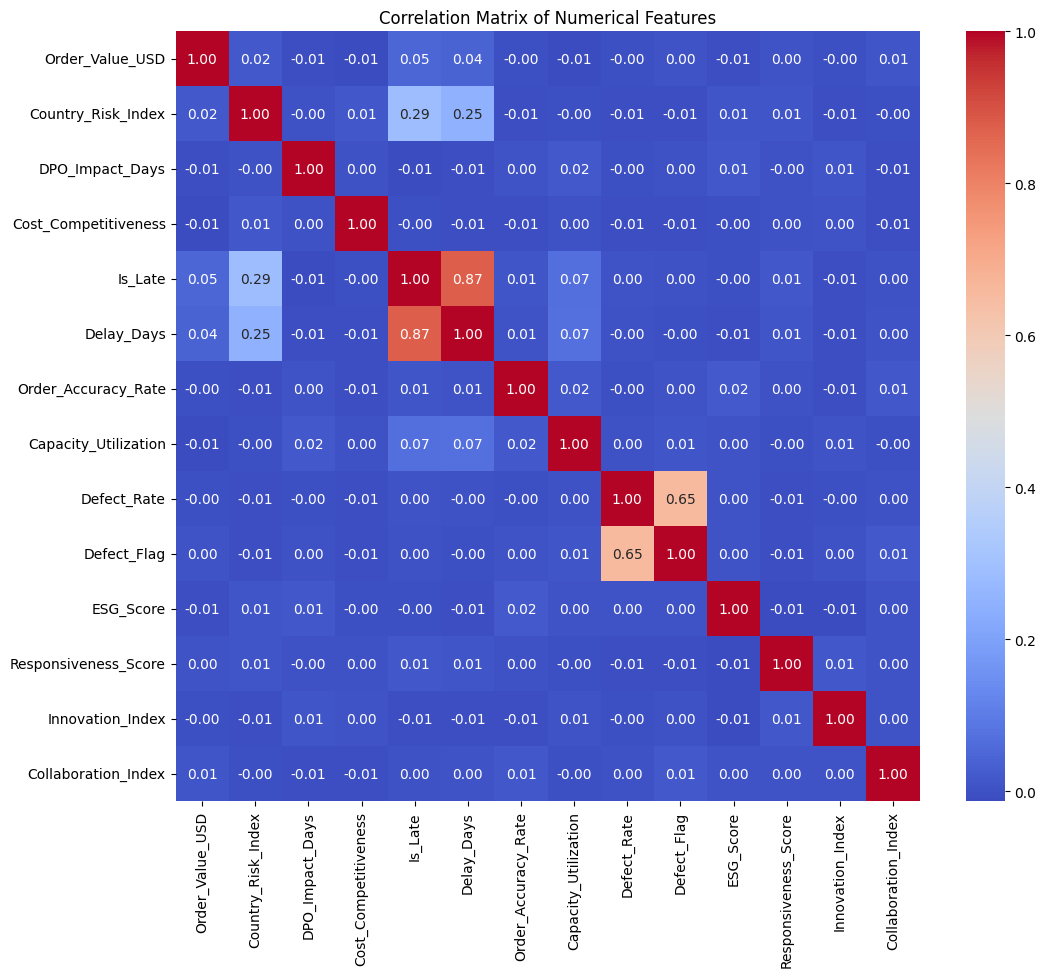

In [4]:
#Correlation Matrix (Numerical features only)
plt.figure(figsize=(12, 10))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')

Text(0.5, 1.0, 'Country Risk Index by Late Status')

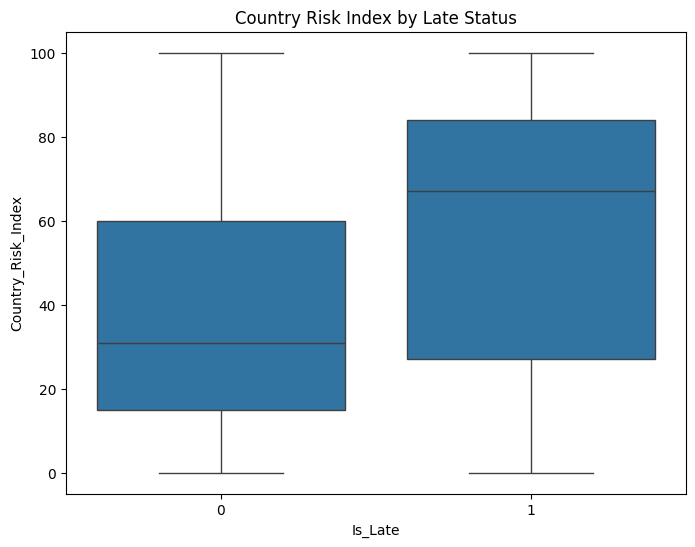

In [5]:
#Visualizing Risk vs Late
plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_Late', y='Country_Risk_Index', data=df)
plt.title('Country Risk Index by Late Status')

In [6]:
# 1. Define all columns to drop
# We drop IDs, Dates, Targets, and "Root Cause" text columns (which are data leakers)
cols_to_drop = [
    'Order_ID',
    'Order_Date',
    'Scheduled_Delivery_Date',
    'Actual_Delivery_Date',   # LEAKER: Reveals actual delay
    'Is_Late',                # TARGET
    'Delay_Days',             # TARGET
    'Delay_Root_Cause',       # LEAKER: Contains "On Time" or delay reason
    'Defect_Root_Cause',      # LEAKER: Reveals defect status
    'Risk_Reason_Geo',        # Text explanation (drop unless encoding)
    'Financial_Risk_Reason',  # Text explanation (drop unless encoding)
    'Relationship_Issue',     # Text explanation (drop unless encoding)
    'Climate_Zone_Detail'     # Text explanation (drop unless encoding)
]

# 2. Safety Check: Only drop columns that actually exist in the dataframe
existing_cols_to_drop = [c for c in cols_to_drop if c in df.columns]

# 3. Create X (Features) and y (Targets)
X = df.drop(columns=existing_cols_to_drop)
y_class = df['Is_Late']
y_reg = df['Delay_Days']

print(f"✅ Features Prepared: {X.shape[1]} columns ready for training.")
print(f"   Dropped Leakers: {[c for c in existing_cols_to_drop if 'Cause' in c or 'Reason' in c]}")

✅ Features Prepared: 21 columns ready for training.
   Dropped Leakers: ['Delay_Root_Cause', 'Defect_Root_Cause', 'Risk_Reason_Geo', 'Financial_Risk_Reason']


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
# Encode Categoricals
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [8]:
# Split Data
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42
)

In [9]:
# Model Training & Evaluation

# --- Classification (Is_Late) ---
print("\n--- 2. Classification Model (Random Forest) ---")
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_class_train)
y_class_pred = clf.predict(X_test)


--- 2. Classification Model (Random Forest) ---


In [10]:
print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("\nClassification Report:\n", classification_report(y_class_test, y_class_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_class_test, y_class_pred))

Accuracy: 0.7005

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79      1282
           1       0.62      0.42      0.50       718

    accuracy                           0.70      2000
   macro avg       0.67      0.64      0.64      2000
weighted avg       0.69      0.70      0.68      2000


Confusion Matrix:
 [[1097  185]
 [ 414  304]]



Top 10 Features for Classification:
                  Feature  Importance
6     Country_Risk_Index    0.103742
5        Order_Value_USD    0.078395
12  Capacity_Utilization    0.075254
13           Defect_Rate    0.073202
20   Collaboration_Index    0.069124
17             ESG_Score    0.068068
19      Innovation_Index    0.067719
18  Responsiveness_Score    0.065515
9        DPO_Impact_Days    0.065447
10  Cost_Competitiveness    0.055052


Text(0.5, 1.0, 'Top 10 Feature Importances (Classification)')

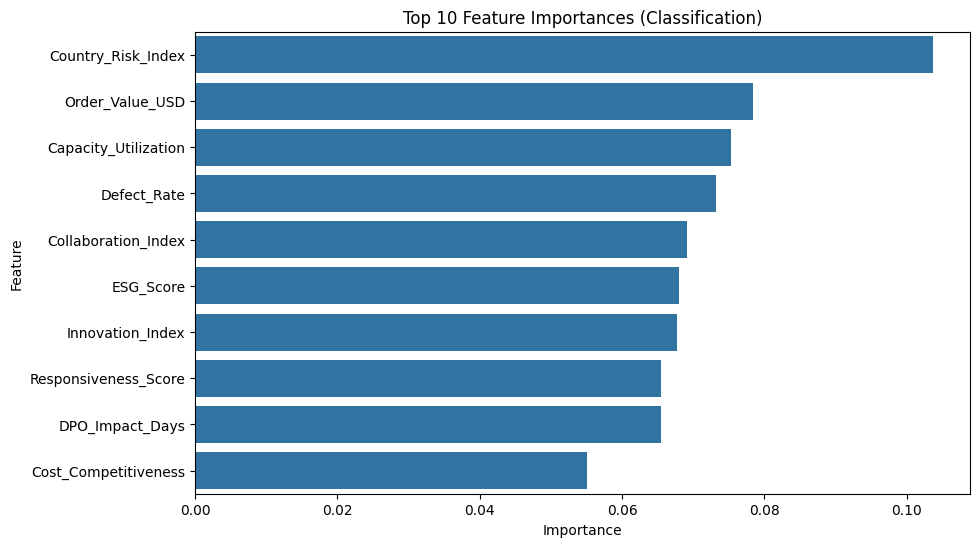

In [11]:
# Feature Importance (Classification)
feature_imp_class = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_}).sort_values('Importance', ascending=False).head(10)
print("\nTop 10 Features for Classification:\n", feature_imp_class)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_class)
plt.title('Top 10 Feature Importances (Classification)')
